# Load and initialize

settings

In [1]:
# dir="~/Desktop/biology/breast_cancer/data/"
# ubunto:
# old samples
dir1="~/Dropbox/CyTOF_Breast/Kaplan_1st/"
# new samples
dir2 = '~/Dropbox/CyTOF_Breast/Kaplan_2nd/data_afterGating/processed data/'
dir3 = '/home/yishai/Dropbox/CyTOF_Breast/Kaplan_3rd/data/'
dir4 = '/home/yishai/Dropbox/CyTOF_Breast/Kaplan_4th/data/'


# show figures (figures are created and saved to file)
show = False
# create plot visualizations
visualize = False
# subsample = True
HistFit = True

# plt.savefig("test.svg", format="svg")
saveSVG = False


envirement

In [2]:

import time 
start = time.process_time()
import os
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
import datetime 
date = datetime.date.today().strftime("%d%m%Y")

import sys
from IPython.display import Image, display
# from tqdm import tqdm_notebook,tqdm
# import time

import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
# import matplotlib.patches as  mpatches
plt.rcParams["figure.figsize"] = (5.0, 4.0)  # Set default size of plots.
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 180) #according to screen width
# from pandas.core.base import PandasObject
# PandasObject.view = view #allows view meth pd.view

# from scipy import signal, stats
import seaborn as sns

# from sklearn import metrics
# from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
# from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
# from sklearn.metrics import silhouette_samples,silhouette_score
# from sklearn.neighbors import kneighbors_graph

from lmfit import minimize, Parameters
# from umap import UMAP

# import scanpy as sc
# import anndata

# import schist as scs

# import networkx as nx

# from castle.common import GraphDAG
# from castle.metrics import MetricsDAG
# from castle.datasets import IIDSimulation, DAG
# from castle.algorithms import PC,Notears,GOLEM,ANMNonlinear,DirectLiNGAM,ICALiNGAM,NotearsLowRank
# import notears.notears as notears

# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon

# import keras
# from keras import layers
# from keras.callbacks import EarlyStopping
# from keras.callbacks import ModelCheckpoint

# from statsmodels.graphics._regressionplots_doc import _plot_influence_doc
# from statsmodels.regression.linear_model import OLS
# from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas import MultiIndex, Int16Dtype
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir+'/functions/')
from plot_functions import *
from usefull_functions import *
from preprocess_functions import *
from functions import *
from impute_functions import *
# from normalization import *
from equalize_distributions import *


%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

dir_data = os.path.abspath(os.path.join(parent_dir, os.pardir))+'/Data/'
dir_indexes = parent_dir + '/indexes/'
# dir_indexes = os.path.abspath(os.path.join(parent_dir, os.pardir))+'/indexes/'

# plot dir
dir_plots = os.path.abspath(os.path.join(parent_dir, os.pardir))+f'/_preproccess_{date}/'

# dir_plots = parent_dir+'/Plots_preproccess/'
settings =        (dir_plots,show,saveSVG)

folderExists(dir_plots)
folderExists(dir_data)
folderExists(dir_indexes)

import shutil
shutil.copy('_params.csv', dir_data)

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it wi

The new directory is created!


'/home/yishai/Data/_params.csv'

# Feature names (Participating panel)

Received CyTOF data is assumed to be only of intact and alive cells without duplicates 

each sample matrix with high dimensionality feature space (NamesAll);
1. 1st cytof batch without: 'NCad','ECad','panKeratin'
2. 2nd cytof batch without: 'p53', 'ZEB1'
3. 3rd cytof batch without: 'p53', 'ZEB1'

un-needed features (removed from  future processing); 
1. 'Live_Dead' (just noise amplification)
2. 'Ir_DNA2'

In [3]:
features = {}
features['NamesAll'] = [  
            'CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin', 'K5', 'EpCam', 'H3K27me2', 'p53', 'EZH2',  
            'gH2AX','aSMA','H3K36me2','H3K4me1','H3K9me2','H4K16ac',
            'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1',  'H3K27ac', 'H4K20me3', 'ER', 'CD49f', 'CD24',
            'GATA3',  'H3K9ac', 'H3K9me3', 'CD44', 'Ki67', 'K8-18', 'H3S28p', 'Ir_DNA2', 'Live_Dead',
            'H3K36me3','H3K4me3','H3K27me3', 'MBD', 'CyclinB1', 'pRB'
        ]
features['Core'] = ['H4','H3', 'H3.3']
# extra cellular are outside the cell - except them everything is noramalized (in group "ToNorm")
features['ToNorm'] = [    
            'H4','H3', 'H3.3','panKeratin', 'K5', 'H3K27me2', 'p53', 'EZH2', 'gH2AX', 'aSMA', 'H3K36me2', 'H3K4me1', 'H3K9me2',
            'H4K16ac', 'H2Aub', 'Vimentin', 'H3K64ac', 'BMI-1', 'ZEB1', 'H3K27ac', 'H4K20me3',
            'ER', 'GATA3', 'H3K9ac', 'H3K9me3', 'Ki67', 'K8-18', 'H3S28p', 'H3K36me3','H3K4me3','H3K27me3',  'MBD', 'CyclinB1', 'pRB'
        ]
features['CellIden'] = [  
            'CD45', 'K5', 'EpCam', 'aSMA', 'Vimentin', 'ZEB1', 'ER', 'CD49f', 'CD24', 'GATA3', 'CD44', 'K8-18',
            'Ki67','p53', 'NCad','ECad','panKeratin','CyclinB1', 'pRB'
        ]
# everything that is not cell identity; 'H4','H3', 'H3.3' are excluded
features['EpiCols'] = [   
            'H3K27me2', 'H3K36me2', 'H3K4me1', 'H3K9me2', 'H4K16ac', 'H2Aub', 'H3K64ac',  
            'H3K27ac', 'H4K20me3', 'BMI-1','EZH2','gH2AX',
            'H3K9ac', 'H3K9me3', 'H3S28p','H3K36me3', 'H3K4me3','H3K27me3','MBD'
        ]
# remove un-needed features
features = removeFeatures(features.copy(),features =['Ir_DNA2', 'Live_Dead'])
# verify: no feature is both in CellIden and EpiCols (CellIden +EpiCols = NamesAll) 
if test_fetures(features): print (f'features are correct!') 
else:    print ('error')     

features are correct!


Load data from csv, and store in dictionary 

In [4]:
# create dictionarys for data and used feature in each sample:
k={}; names = {}
names['figures'] = {#'1':1,'2':1,
                    '3':2,'4':2,'5':2,
                        '4.1':3,'7':1,'8':3,'11':3, 
                                '7.1':1,"13":4,'14':4,"15":4,  }#"14.2":4, withot refernce to rest
names['norm_type'] = {'1':1,'2':1,  
                      '3':2,'4':2,'5':2,    
                      '4.1':2,'7':2,'8':2,'11':2,  
                      '7.1':2,"13":2,'14':2,"15":2, "14.2":2,   
                      
                      '7.3':2,'13.3':2,'14.3':2,'15.3':2
                      }
# 'b1':1,'b2':2, 'b3':2,'b4':2,'b23':2,'b234':2,
names['all'] = features


# 1st cytof batch
# features diffrence of 1st cytof batch - copy into names dict
f = removeFeatures(features.copy(),features =['NCad','ECad','panKeratin','MBD', 'CyclinB1', 'pRB'])
names['1'],names['2']  = f,f
# copy csv data into data dict according to used features dict (names)
k['1'] = pd.read_csv(dir1+"BCK-01_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")[names['1']['NamesAll']]
k['2'] = pd.read_csv(dir1+"BCK-02_noaf_18Sep2022_01_0.fcs_file_internal_comp_residual.csv")[names['2']['NamesAll']]

# 2nd cytof batch
# features diffrence of 2nd cytof batch - copy into names dict
f = removeFeatures(features.copy(),features =['p53','ZEB1','MBD', 'CyclinB1', 'pRB'])
names['3'],names['4'],names['5']  = f,f,f
k['3'] = pd.read_csv(dir2+"export_BCK03_noaf_23Nov2022_01_0_final_cells - processed.csv")[names['3']['NamesAll']]
k['4'] = pd.read_csv(dir2+"export_BCK04_noaf_23Nov2022_02_0_final_cells - processed.csv")[names['4']['NamesAll']]
k['5'] = pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells - processed.csv")[names['5']['NamesAll']]
# later analysis k6 with duplicates
# K6=pd.read_csv(dir2+"export_BCK05_noaf_23Nov2022_01_0_final_cells.csv")

# 3d cytof batch ADDED H3K4me33
# features diffrence of 3d cytof batch - copy into names dict
f = removeFeatures(features.copy(),features =['p53','ZEB1','MBD', 'CyclinB1', 'pRB'])
names['4.1'],names['7'],names['8'],names['11']  = f,f,f,f
k['4.1'] = pd.read_csv(dir3+"export_BCK04_noaf_16Mar2023_03_0_FinalCells.csv")[names['4.1']['NamesAll']]
k['7'] = pd.read_csv(dir3+"export_BCK07_noaf_16Mar2023_03_0_FinalCells.csv")[names['7']['NamesAll']]
k['8'] = pd.read_csv(dir3+"export_BCK08_noaf_16Mar2023_02_0_FinalCells.csv")[names['8']['NamesAll']]
k['11'] = pd.read_csv(dir3+"export_BCK11_noaf_16Mar2023_01_0_FinalCells.csv")[names['11']['NamesAll']]

# 4th cytof batch ADDED H3K4me33
f = removeFeatures(features.copy(),features =['p53','ZEB1','NCad', 'CyclinB1', 'pRB',  ])
names['7.1'],names['13'],names['14'],names['15']  = f,f,f,f
k['7.1'] = pd.read_csv(dir4+"BCK7.1_FinalCells.csv")[names['7.1']['NamesAll']]
k['13'] = pd.read_csv(dir4+"BCK13_FinalCells.csv")[names['13']['NamesAll']]
k['14'] = pd.read_csv(dir4+"BCK14_FinalCells.csv")[names['14']['NamesAll']]
k['15'] = pd.read_csv(dir4+"BCK15_FinalCells.csv")[names['15']['NamesAll']]
names['14.2'] = removeFeatures(features.copy(),features =['p53','ZEB1', 'NCad',     'H3K4me1', 'H2Aub', 'MBD'])
k['14.2'] = pd.read_csv(dir4+"BCK14.2_FinalCells.csv")[names['14.2']['NamesAll']]



# gating and oulier removal



gating - fix fluidigm gating result; In-gate and outlier removal (Samples with low number of events)

Samples with low number of events are discarded (outliers) - remove outlier 99.99% from all

In gate to achieve good normalization - gate on H3.3/H4 was too low


In [5]:
arr=[]
GateColumns=['H3.3','H4']#,'H3']#,'H3']
for i, K ,in k.items():
    
    initialSize = len(K)
    if names['norm_type'][i]==1:
      K,tmp = Gate(K.copy(), i,['H3.3','H4'])
    elif names['norm_type'][i]==2:
      K,tmp = Gate(K.copy(),i,['H3','H3.3','H4'])
    else: #ERROR
       K = None
    finalSize = len(K)
    # print (f'k{i}: gated with method {norm_type}, initial size: {initialSize}, after gating and outliers: {finalSize} ({np.round(finalSize/initialSize*100,2)}%)')
    k[i] = K.reset_index(drop=True)
    arr += tmp

saveCsv_split(dir_plots,'gate',arr)


['sample 1: H3.3 percentage = 96.89999999999999']
['sample 1: H4 percentage = 78.7']
['sample 2: H3.3 percentage = 95.39999999999999']
['sample 2: H4 percentage = 61.6']
['sample 3: H3 percentage = 32.1']
['sample 3: H3.3 percentage = 85.6']
['sample 3: H4 percentage = 48.699999999999996']
['sample 4: H3 percentage = 99.1']
['sample 4: H3.3 percentage = 99.5']
['sample 4: H4 percentage = 94.5']
['sample 5: H3 percentage = 93.89999999999999']
['sample 5: H3.3 percentage = 99.2']
['sample 5: H4 percentage = 91.10000000000001']
['sample 4.1: H3 percentage = 99.7']
['sample 4.1: H3.3 percentage = 99.9']
['sample 4.1: H4 percentage = 99.6']
['sample 7: H3 percentage = 96.3']
['sample 7: H3.3 percentage = 99.7']
['sample 7: H4 percentage = 98.6']
['sample 8: H3 percentage = 97.1']
['sample 8: H3.3 percentage = 99.8']
['sample 8: H4 percentage = 98.9']
['sample 11: H3 percentage = 95.1']
['sample 11: H3.3 percentage = 99.7']
['sample 11: H4 percentage = 99.0']
['sample 7.1: H3 percentage = 93

In [6]:
# from plot_functions import *
# if visualize:
# #   interst=[  'CD45','CD44', 'EpCam', 'Vimentin', 'CD49f','CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin',]
#   interst=names['all']['NamesAll']

#   plot_hist(k,interst,names['figures'],settings,
#             func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 

fit histogram (qqfit\linear fit)' MixedFit,qqFit,LinearFit
we fit from 4 into 4.1 (samples 4,5)


In [7]:
if HistFit:
    k4 = subsample_k(k['4'].copy(),'4_fit',dir_indexes,n=20000)
    k41 = subsample_k(k['4.1'].copy(),'41_fit',dir_indexes,n=20000)
        


    for i in ['4','5'] :     
        k[i],dropped_cols =  fitDF(fit_into = k41.copy(),fit_from = k4.copy(),
            df_to_fit = k[i].copy(),func = MixedFit)
        print(f'sample {i} fitted with dropped cols: {dropped_cols} ') 

        names[i] = removeFeatures(names[i].copy(),dropped_cols)
        names['all'] = removeFeatures(names['all'].copy(),dropped_cols)
        
    k4=None;k41 = None

    k7 = subsample_k(k['7'].copy(),'7_fit',dir_indexes,n=20000)
    k71 = subsample_k(k['7.1'].copy(),'71_fit',dir_indexes,n=20000)

    k['7.3'] = k['7.1'].copy();names['7.3'] = names['7.1'].copy()
    k['13.3'] = k['13'].copy();names['13.3'] = names['13'].copy()
    k['14.3'] = k['14'].copy();names['14.3'] = names['14'].copy()
    k['15.3'] = k['15'].copy();names['15.3'] = names['15'].copy()


    for i in ['7.1','13','14','15'] : #14.2 is not fitted   
        k[i],dropped_cols =  fitDF(fit_into = k7.copy(),fit_from = k71.copy(),
            df_to_fit = k[i].copy(),func = MixedFit)
        print(f'sample {i} fitted with dropped cols: {dropped_cols} ') 

        names[i] = removeFeatures(names[i].copy(),dropped_cols)
        names['all'] = removeFeatures(names['all'].copy(),dropped_cols)

    k7=None;k71 = None

    for i, K in k.items():
        dict = None;dict ={}
        dict['k'] = K.copy()
        pickle_dump('k_fit'+i+'_dict', dict,dir_data)
        print ('k'+i+ '; samples = ', len(K), ', fetures = ', len(K.columns),'; saved to file')
    pickle_dump('names_dict', names.copy(),dir_data)
else:
    names = pickle_load('names_dict', dir_data)
    k = {}
    for j in names['norm_type'].keys():
        k[j] = pickle_load('k_fit'+j+'_dict', dir_data)['k']
   
    # pickle_dump('names_dict', names.copy(),dir_data)

4_fit_subsample_indexes ; loaded from file
original size: 374890, new size: 20000 indexes loaded from file
41_fit_subsample_indexes ; loaded from file
original size: 110463, new size: 20000 indexes loaded from file
sample 4 fitted with dropped cols: [] 
sample 5 fitted with dropped cols: [] 
7_fit_subsample_indexes ; loaded from file
original size: 66741, new size: 20000 indexes loaded from file
71_fit_subsample_indexes ; loaded from file
original size: 43418, new size: 20000 indexes loaded from file
sample 7.1 fitted with dropped cols: ['MBD'] 
sample 13 fitted with dropped cols: ['MBD'] 
sample 14 fitted with dropped cols: ['MBD'] 
sample 15 fitted with dropped cols: ['MBD'] 
k1; samples =  4811 , fetures =  35 ; saved to file
k2; samples =  181275 , fetures =  35 ; saved to file
k3; samples =  815 , fetures =  36 ; saved to file
k4; samples =  374890 , fetures =  36 ; saved to file
k5; samples =  68765 , fetures =  36 ; saved to file
k4.1; samples =  110463 , fetures =  36 ; saved t

# impute

impute EpiCols with the right dist

In [8]:

# n = names['all']['EpiCols'].copy()
# remove cropped distrunutions
# for f in ['H3K4me1','H3K4me3','H3K27me2','H3K36me2','H3S28p']:
#     n.remove(f)
# zeros = getZerosMat(k,index=['1','2','3','4','5'],columns = n)

zeros = getZerosMat(k,columns = names['all']['NamesAll'].copy(),percent = 0)
zeros.to_csv(settings[0]+'raw_zeros.csv')
# print(zeros)
# # m=
# # 

In [9]:
# def plot_hist(k,NamesAll,figures,settings,func = sns.kdeplot ,title = '',Figname = '' ):
    
#     arr = np.linspace(0, 1, len (k.keys()))    
#     colors = cm.rainbow(arr)
#     for M in NamesAll: 
#         fig, ax = plt.subplots(1,2,figsize=(10,4))
        
#         for [i, K],color,fig_num in zip(k.items(),colors,figures):
#             fig_num -= 1
#             ax[fig_num].set_ylim(0,5000)
#             ax[fig_num].set_xlim(0,500)

#             # sns.kdeplot(K[M],c=c,label='Tumor ' + i)
#             try: #if K doesnt contain the feature pass..
#               q=func(K[M],color=color,label='Tumor ' + i,ax = ax[fig_num])
#               # sns.kdeplot(K2[M],c='g',label='Tumor 2')
#               ax[fig_num].title.set_text(title)
#               ax[fig_num].legend()
              
              
#             except:
#               pass
        
#         figname = Figname + M
        
#         dir,show,saveSVG = settings
#         plt.savefig(dir+figname+'.png', format="png", bbox_inches="tight", pad_inches=0.2)
#         if saveSVG:
#             plt.savefig(dir+figname+'.svg', format="svg", bbox_inches="tight", pad_inches=0.2)
#         if show:
#             plt.show()
#         else:
#             plt.close()


In [10]:
# i='1'
# n=zeros.T[zeros.T['1'].notnull()].index.tolist()

# nonzeros = MimalzerosOverlap(k[i].copy(),names[i]['Core']+names[i]['CellIden'],n)
# features = nonzeros.columns
# K = k[i].copy()
# # features=['p53']
# df = pd.DataFrame(index=['mse','mae','accuracy'],columns = features)

# for feature in features:

#     K,mse, mae, accuracy = xg(nonzeros,K,feature)
#     df.at['mse',feature] = mse
#     df.at['mae',feature] = mae
#     df.at['accuracy',feature] = accuracy



In [11]:
# print(zeros.T[zeros.T['1'].notnull()].index.tolist())
# print(df.T.index)
# print(df.T)

In [12]:
# print(df.T) 
# print(K)

save the raw data

# arcsinh data transformation (semi log scaling):
  
  1. find ki67 neg using scale argument = 0.1
  2. actual data transformation with scale argument = 5

find ki67

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


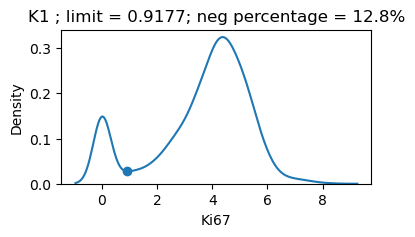

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


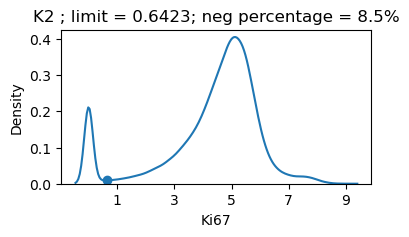

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


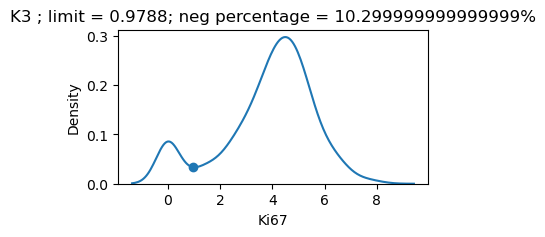

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


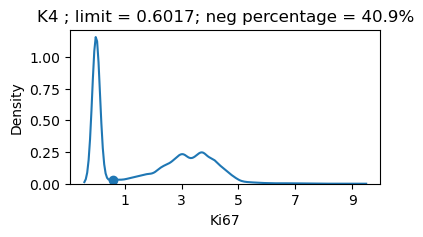

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


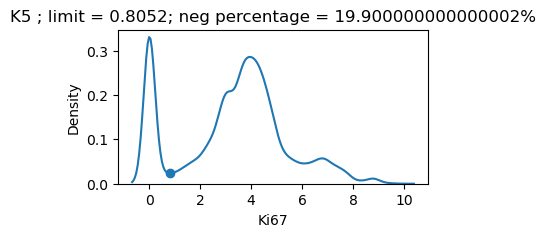

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


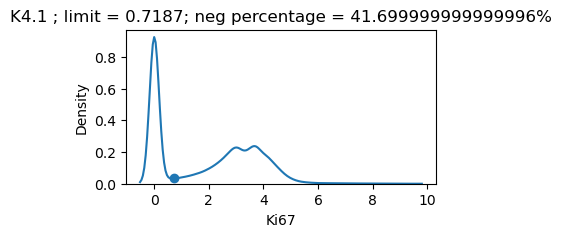

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


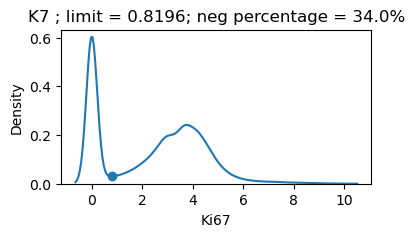

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


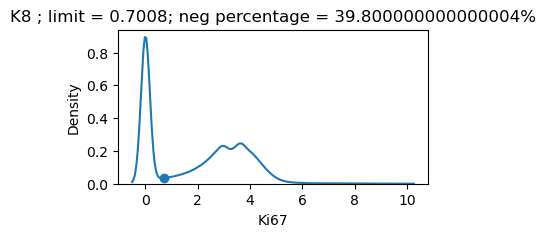

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


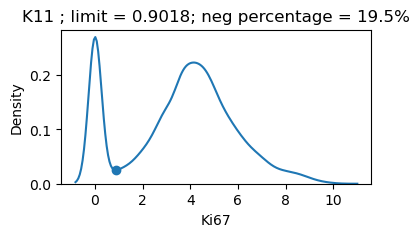

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


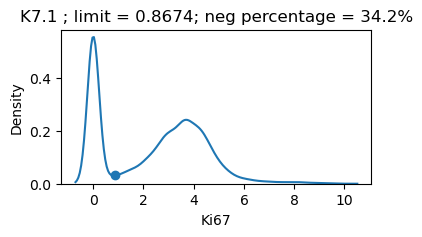

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


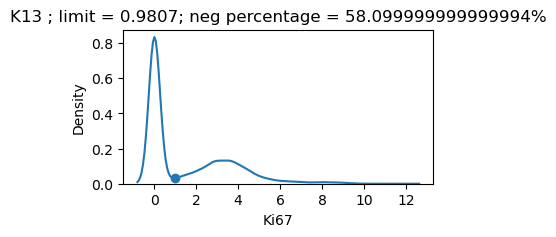

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


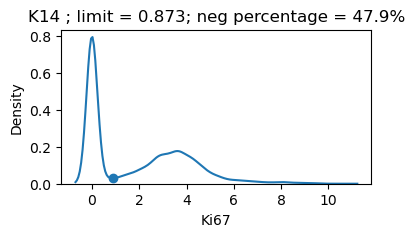

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


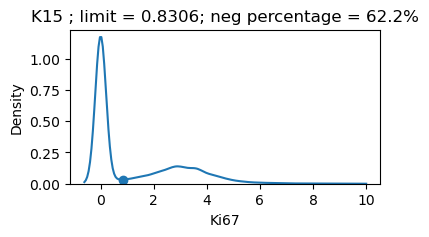

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


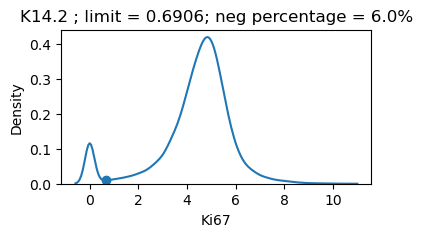

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


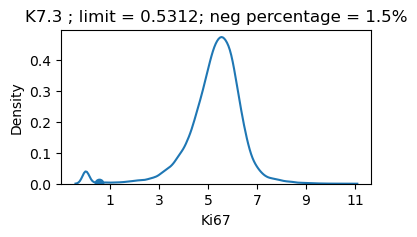

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


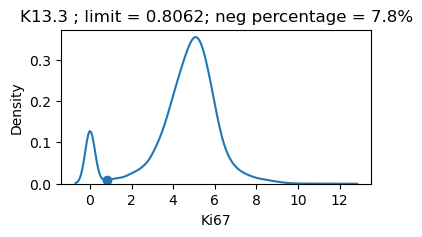

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


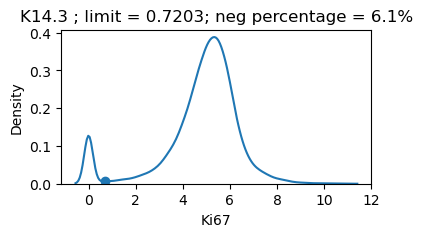

/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/scipy/signal/_peak_finding.py:1192: RuntimeWarning: divide by zero encountered in double_scalars
  snr = abs(cwt[line[0][0], line[1][0]] / noises[line[1][0]])


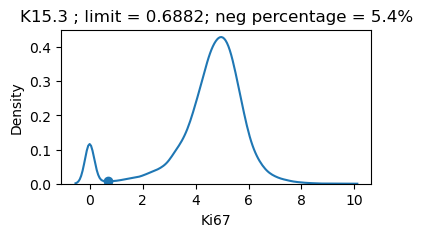

['sample 1: Ki67 percentage = 12.8']
['sample 2: Ki67 percentage = 8.5']
['sample 3: Ki67 percentage = 10.299999999999999']
['sample 4: Ki67 percentage = 40.9']
['sample 5: Ki67 percentage = 19.900000000000002']
['sample 4.1: Ki67 percentage = 41.699999999999996']
['sample 7: Ki67 percentage = 34.0']
['sample 8: Ki67 percentage = 39.800000000000004']
['sample 11: Ki67 percentage = 19.5']
['sample 7.1: Ki67 percentage = 34.2']
['sample 13: Ki67 percentage = 58.099999999999994']
['sample 14: Ki67 percentage = 47.9']
['sample 15: Ki67 percentage = 62.2']
['sample 14.2: Ki67 percentage = 6.0']
['sample 7.3: Ki67 percentage = 1.5']
['sample 13.3: Ki67 percentage = 7.8']
['sample 14.3: Ki67 percentage = 6.1']
['sample 15.3: Ki67 percentage = 5.4']


In [13]:
# from plot_functions import *
arr = []
f = 'Ki67'
kk = k.copy()
min_x,min_y,Ki67Neg_ind ={},{},{}
for [i, K] in kk.items():
    # K = K['Ki67'].copy()
    # m = K['Ki67'].max()
    K = arcsinh_transform(K.copy(),scale = 0.1)
    # print (f'k{i}; Ki67 arcsinh transformed - {scale}')
    min_x[i],min_y[i] = splitInversePDF(K,i,f)
    kk[i] = K
    # kk[i] = K
    Ki67Neg_ind[i]= K[f]<min_x[i]
    # print(f'k{i}; value with highest *inverse* probability:', min_x[i])
    neg_percentage = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
    arr.append([i,f,neg_percentage])
    plotSplit(K[f],i,min_x[i],min_y[i],settings,neg_percentage,Figname = f'_{f}_split',log = False)
saveCsv_split(dir_plots,'neg_pecentage',arr)
kk = None

data transformation

In [14]:
# if visualize:

# plot_hist(kk,[  'Ki67'],names['figures'],(settings[0],True,True),
#             func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 

In [15]:

for i, K in k.items():
    k[i] = arcsinh_transform(K.copy())
    print ('k' + i,'; arcsinh transformed')

k1 ; arcsinh transformed
k2 ; arcsinh transformed
k3 ; arcsinh transformed
k4 ; arcsinh transformed
k5 ; arcsinh transformed
k4.1 ; arcsinh transformed
k7 ; arcsinh transformed
k8 ; arcsinh transformed
k11 ; arcsinh transformed
k7.1 ; arcsinh transformed
k13 ; arcsinh transformed
k14 ; arcsinh transformed
k15 ; arcsinh transformed
k14.2 ; arcsinh transformed
k7.3 ; arcsinh transformed
k13.3 ; arcsinh transformed
k14.3 ; arcsinh transformed
k15.3 ; arcsinh transformed


visualization

Kernel Distribution Estimation Plot (kdeplot) is the probability density function plot;
1. can plot for the univariate (single variable) or multiple variables altogether. 
2. y = probability, x = feature value after arcsinh transformation (can be also negative)
3. arcsinh probability density plot - analysis of herogeneity (division to multiple populations)

results:
1. cd45 - we want only the negative population
2. close populations - epcam, vimentin,cd49f
3. far populations - cd44

In [16]:
# from plot_functions import *
if visualize:
#   interst=[  'CD45','CD44', 'EpCam', 'Vimentin', 'CD49f','CD45','H4','H3', 'H3.3','NCad','ECad','panKeratin',]
  interst=names['all']['NamesAll']

  plot_hist(k,interst,names['figures'],settings,
            func = sns.kdeplot,title = 'ArcSinh Unnormalized',Figname = '1_Hist_ArcSinh_Unnormalized_' ) 

# Split CD45 neg 

the only interesting population

In [17]:
# kk=k. copy() 
# k = kk.copy()
# settings=(settings[0],True,True);visualize=True

In [18]:
arr=[]
KCD45Neg_ind ,min_x, min_y = {},{},{}
f = 'CD45'

for [i, K], xMin in zip(k.items(),
                [1.87,2.172,
                 0.98,0.06,1.23,
                 0.072,0.11,0.10,0.14,
                 0.1,0.6,0.1,0.1,0.1,
                 0.09,0.6,0.09,0.09]):

    if xMin == None: #there  are 2 defined dist and minima can be found not manually
         min_x[i],min_y[i] = splitInversePDF(K,i,'CD45')
    else:
        # min_x[i] = xMin
        # if visualize:
        min_x[i],min_y[i] = splitInversePDF(K,i,f,min_x = xMin)
    KCD45Neg_ind[i]= K['CD45']<min_x[i]
    neg_percentage = np.round(len(K[K[f]<min_x[i]])/len(K),3)*100
    arr.append([i,f,neg_percentage])
    print(f'k{i}; value with highest *inverse* probability:', min_x[i])

if visualize:
    for i, K in k.items():
        plotSplit(K[f],i,min_x[i],min_y[i],settings,neg_percentage,Figname = '_cd45_split',log = False,)#XSIZE=10
saveCsv_split(dir_plots,'neg_pecentage',arr)
    


k1; value with highest *inverse* probability: 1.87
k2; value with highest *inverse* probability: 2.172
k3; value with highest *inverse* probability: 0.98
k4; value with highest *inverse* probability: 0.06
k5; value with highest *inverse* probability: 1.23
k4.1; value with highest *inverse* probability: 0.072
k7; value with highest *inverse* probability: 0.11
k8; value with highest *inverse* probability: 0.1
k11; value with highest *inverse* probability: 0.14
k7.1; value with highest *inverse* probability: 0.1
k13; value with highest *inverse* probability: 0.6
k14; value with highest *inverse* probability: 0.1
k15; value with highest *inverse* probability: 0.1
k14.2; value with highest *inverse* probability: 0.1
k7.3; value with highest *inverse* probability: 0.09
k13.3; value with highest *inverse* probability: 0.6
k14.3; value with highest *inverse* probability: 0.09
k15.3; value with highest *inverse* probability: 0.09
['sample 1: CD45 percentage = 36.8']
['sample 2: CD45 percentage 

In [19]:
# if visualize:
#   colors = cm.rainbow(np.linspace(0, 1, len (k.keys())))
#   fig, ax = plt.subplots(1,2,figsize=(10,3))
#   for i, K in k.items(): 
#     #   
#     j =  names['figures'][int(i)-1]-1 
#     sns.histplot(K.CD45,color=colors[int(i)-1],label='T'+i,stat='density',element='step',fill=False,ax = ax[j])
#     ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#     ax[j].set_yscale('log')
#     ax[j].title.set_text('cd45 split histplot')
#   plt.savefig(dir_plots+'cd45_split_histplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

 


#   fig, ax = plt.subplots(1,2,figsize=(12,3))
#   for [i, K],[h, KCD45Neg] in zip( k.items(),kCD45Neg.items()):
#       j =  names['figures'][int(i)-1]-1 
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],label='T'+i,ax = ax[j])
#       sns.kdeplot(K.CD45,color=colors[int(i)-1],ls='--',label='T'+i+' CD45-',ax = ax[j])
#       ax[j].legend(loc='upper center',bbox_to_anchor=(1,1))
#       ax[j].set_yscale('log')
#       ax[j].title.set_text('cd45 split kdeplot')
#   plt.savefig(dir_plots+'cd45_split_kdeplot.svg', format="svg", bbox_inches="tight", pad_inches=0.2)

      

Continue only with CD45 neg population

1. delete cd45+ population and continue with k  = kCD45Neg
2. delete cd45 feature from data 



In [20]:

dict ={}

for i, K in k.items():
    
    newK = K[KCD45Neg_ind[i]].copy().reset_index(drop=True).drop('CD45',axis=1)
    print(f'k{i}: CD45+ removal - initial: {len(K)}, final:{len(newK)} ({np.round(len(newK)/len(K)*100,2)}%)')
    dict[i ] = newK
    newK=None
    names[i]  = removeFeatures(names[i].copy(),['CD45'])
k =None; k=dict 
names['all']  = removeFeatures(names[i].copy(),['CD45'])
# dict ={}
# for i, K in k.items():
  

#   # remove from features lists(names)
#   N = names[i]
#   for j, sublist in N.items():
#     try:
#       sublist.remove('CD45')
#     except:
#       pass
#     N[j] = sublist
#   dict[i] = N
# #   remove index 3 and copy to new dict
# # names['figures'].pop(3-1)
# dict['figures'] = names['figures']
# # names['norm_type'].pop(3-1)
# dict['norm_type'] = names['norm_type']
# dict['all'] = names['all']
# del names; names=dict 

k1: CD45+ removal - initial: 4811, final:1772 (36.83%)
k2: CD45+ removal - initial: 181275, final:39276 (21.67%)
k3: CD45+ removal - initial: 815, final:33 (4.05%)
k4: CD45+ removal - initial: 374890, final:335948 (89.61%)
k5: CD45+ removal - initial: 68765, final:63252 (91.98%)
k4.1: CD45+ removal - initial: 110463, final:99425 (90.01%)
k7: CD45+ removal - initial: 66741, final:57081 (85.53%)
k8: CD45+ removal - initial: 124725, final:108516 (87.0%)
k11: CD45+ removal - initial: 38864, final:33051 (85.04%)
k7.1: CD45+ removal - initial: 43418, final:36976 (85.16%)
k13: CD45+ removal - initial: 24167, final:22667 (93.79%)
k14: CD45+ removal - initial: 58303, final:49458 (84.83%)
k15: CD45+ removal - initial: 40010, final:35069 (87.65%)
k14.2: CD45+ removal - initial: 31957, final:25229 (78.95%)
k7.3: CD45+ removal - initial: 43418, final:35899 (82.68%)
k13.3: CD45+ removal - initial: 24167, final:22687 (93.88%)
k14.3: CD45+ removal - initial: 58303, final:48183 (82.64%)
k15.3: CD45+ re

# Normalize using new method on all intercellular markers

save pre normalized data

In [21]:
# for i, K in k.items():
#     try:
#       del dict;dict ={}
#     except:
#         dict ={}
#     dict['k'] = K
#     pickle_dump('k'+i+'_prenorm_dict', dict,dir_data)

In [22]:
# for i, K in k.items():
#     k[i]['by_sample'] = float(i)
#     names[i]['ind'] = k[i]['by_sample']

# # merged dataset is normalize with H3 and plot by its own fig
# # names['norm_type'].append(2)
# # names['figures'].append(4)

# # uncommon features between samples and samples index to append

# b23 = ['p53', 'ZEB1' ];b23ind = [ '4', '5', '4.1', '7', '8', '11']
# b123 = ['NCad','ECad','panKeratin',  'p53', 'ZEB1'];b123ind = ['1', '2', '4', '5', '4.1', '7', '8', '11']
# # b4= ['p53', 'ZEB1' ];b4ind = [ '4', '4.1']


# # remove the uncommonFeatures from the  mutual list, create data-dict without uncommonFeatures and append into single dataset
# names['b123']  = removeFeatures(names['all'].copy(),b123)
# k['b123'],names['b123']['ind'] = createAppendDataset(names['b123'],getAppendDict(k.copy(),b123ind,b123 ),n=1771)

# names['b23']  = removeFeatures(names['all'].copy(),b23)
# k['b23'],names['b23']['ind'] = createAppendDataset(names['b23'],getAppendDict(k.copy(),b23ind,b23 ),n=2000)

# # names['b4']  = removeFeatures(names['all'].copy(),b4)
# # k['b4'],names['b4']['ind'] = createAppendDataset(names['b4'],getAppendDict(k.copy(),b4ind,b4 ),n=5000)


2 step normalization:

1- normalize gardient (TBD)

1- normalize using core

insight: since its the minima multiple rus with same effect as one run

note: features to norm (i.e names[i]['ToNorm']) are different on each sample

In [23]:
# if visualize:
#   for i, K in k.items():
#     print ('k' + i,', initial std:')
#     print(K.std().to_frame().T)




def normalize_data(k,sample,names):
    for i, K in k.items():
        # i = '7.1';K = k[i]
        norm_type = names['norm_type'][i]
        
        
        # FIRST STEP - normalize_gardient by core 
        # SECOND STEP - normalize ToNorm fetures by the core features ['H3.3','H4']
        
        if norm_type==1:
          K=NormalizeNew2(K,names[i]['ToNorm'])
          K = Mean_Core_normalization(K, names[i]['ToNorm'],coreFetures=['H3.3','H4'])
          
        elif norm_type==2:
          K=NormalizeNew(K,names[i]['ToNorm'])
          K = Mean_Core_normalization(K, names[i]['ToNorm'],coreFetures=['H4','H3', 'H3.3'])
        else: 
          print ('error')
          break
        
        k[i] = K 
        print (sample + i,f'; normalized with method {norm_type}')
    return k

k = normalize_data(k.copy(),'k',names)

k1 ; normalized with method 1
k2 ; normalized with method 1
k3 ; normalized with method 2
k4 ; normalized with method 2
k5 ; normalized with method 2
k4.1 ; normalized with method 2
k7 ; normalized with method 2
k8 ; normalized with method 2
k11 ; normalized with method 2
k7.1 ; normalized with method 2
k13 ; normalized with method 2
k14 ; normalized with method 2
k15 ; normalized with method 2
k14.2 ; normalized with method 2
k7.3 ; normalized with method 2
k13.3 ; normalized with method 2
k14.3 ; normalized with method 2
k15.3 ; normalized with method 2


subsample original data; verify n<=5000 
add columns so we would know from which samp any data arrived from

In [24]:

for i in k.keys():
    print(i) 
    k[i] = subsample_k(k[i].copy(),i,dir_indexes,n=5000).reset_index(drop = True)

# list(k.keys())[:9]
for i, K in k.items():
    k[i]['by_sample'] = float(i)
    k[i]['Ind'] = k[i].index

    names[i]['by_sample'] = k[i]['by_sample'].copy() 
    names[i]['Ind'] = k[i]['Ind'].copy() 

1
original size: 1772, file unchanged
2
2_subsample_indexes ; loaded from file
original size: 39276, new size: 5000 indexes loaded from file
3
original size: 33, file unchanged
4
4_subsample_indexes ; loaded from file
original size: 335948, new size: 5000 indexes loaded from file
5
5_subsample_indexes ; loaded from file
original size: 63252, new size: 5000 indexes loaded from file
4.1
4.1_subsample_indexes ; loaded from file
original size: 99425, new size: 5000 indexes loaded from file
7
7_subsample_indexes ; loaded from file
original size: 57081, new size: 5000 indexes loaded from file
8
8_subsample_indexes ; loaded from file
original size: 108516, new size: 5000 indexes loaded from file
11
11_subsample_indexes ; loaded from file
original size: 33051, new size: 5000 indexes loaded from file
7.1
7.1_subsample_indexes ; loaded from file
original size: 36976, new size: 5000 indexes loaded from file
13
13_subsample_indexes ; loaded from file
original size: 22667, new size: 5000 indexes lo

# create batches
1. samples were  subsampled to a reasonable size (previous cell)
2. every sample is fully inside the batch  - so we know for each index were it came from
    1. (the index exists both in the batch and in the sample)

In [25]:


# merged dataset is normalize with H3 and plot by its own fig
# names['norm_type'].append(2)
# names['figures'].append(4)

# uncommon features between samples and samples index to append

b23 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB' ];b23ind = [ '4', '5', '4.1', '7', '8', '11']
b234 = ['p53', 'ZEB1','NCad','MBD', 'CyclinB1', 'pRB' ];b234ind = [ '4', '5', '4.1', '7', '8', '11',
                                                            '7.1', '13','14','15']

# b123 = ['NCad','ECad','panKeratin',  'p53', 'ZEB1'];b123ind = ['1', '2', '4', '5', '4.1', '7', '8', '11'] problematic since 1,2 with less than 5000samples
b3 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB' ];b3ind = [  '4.1', '7', '8', '11']
b2 = ['p53', 'ZEB1','MBD', 'CyclinB1', 'pRB'];b2ind = [  '4', '5']
b4 = ['p53', 'ZEB1','NCad', 'CyclinB1', 'pRB' ];b4ind = [  '7.3', '13.3','14.3','15.3']


# remove the uncommonFeatures from the  mutual list, create data-dict without uncommonFeatures and append into single dataset
# k['b123'],names['b123'] = createAppendDataset(k.copy(),names['all'].copy(),b123ind,b123 )
k['b23'],names['b23']= createAppendDataset(k.copy(),names['all'].copy(),b23ind,b23 )

k['b234'],names['b234']= createAppendDataset(k.copy(),names['all'].copy(),b234ind,b234 )

k['b4'],names['b4']= createAppendDataset(k.copy(),names['all'].copy(),b4ind,b4 )

k['b3'],names['b3']= createAppendDataset(k.copy(),names['all'].copy(),b3ind,b3 )
k['b2'],names['b2']= createAppendDataset(k.copy(),names['all'].copy(),b2ind,b2 )



# ['p53','ZEB1','MBD', 'CyclinB1', 'pRB'])
# ['p53','ZEB1','NCad', 'CyclinB1', 'pRB',  ]

# k['b23ad'] = load_adjusted_batch('b23',k['b23'].copy(),dir_indexes);
# names['b23ad'] = names['b234'].copy()



save pre-scaled data to file

In [26]:
# for i, K in k.items():
#     try:
#       del dict;dict ={}
#     except:
#         dict ={}
#     dict['k'] = K
#     pickle_dump('k'+i+'_prescaled_dict', dict,dir_data)

# Scale data 

using mean, std (whiten data) - achieve std close to 1 mean close to 0

In [27]:

for i, K in k.items():
    
    k[i] = scale_data(K)
    print (f'k{i} scaled')
    # print(K.std().to_frame().T)
# the index numbers are unfortunately passes into scaling and norm
# after scaling rturn the unscled index numbers
for i, K in k.items():
    k[i]['by_sample'] = names[i]['by_sample']
    k[i]['Ind'] = names[i]['Ind']
    names[i]['by_sample'] = None;names[i]['Ind'] = None
    
    


k1 scaled
k2 scaled
k3 scaled
k4 scaled
k5 scaled
k4.1 scaled
k7 scaled
k8 scaled
k11 scaled
k7.1 scaled
k13 scaled
k14 scaled
k15 scaled
k14.2 scaled
k7.3 scaled
k13.3 scaled
k14.3 scaled
k15.3 scaled
kb23 scaled
kb234 scaled
kb4 scaled
kb3 scaled
kb2 scaled


In [28]:

if visualize:
    plot_hist(k,names['all']['NamesAll'],names['figures'],settings,
        func = sns.kdeplot,title = 'Normalized + Scaled',Figname = '2_Hist_normalized_scaled_' )     

## final
1. Save data to file (pickle)
2. drop sample 3
3. convert images to pdf


In [29]:
# for i, K in k.items():
  
#   print(len(list(K.columns)))
#   print(len(names[i]['NamesAll']))

kInd = list(k.keys());kInd.remove('3')
for i in kInd:
    
    dict = None;dict ={}
    dict['k'] = k[i].copy()
    pickle_dump('k'+i+'_dict', dict,dir_data)
    
    
    dict = None;dict ={}
    dict = names[i]
    # dict['all'] = names['all']
    pickle_dump('k'+i+'_names_dict', dict,dir_data)
    print ('k'+i+ '; samples = ', len(k[i]), ', fetures = ', len(K.columns),'; saved to file')



end = time.process_time()
print ('total run time =', end-start )

k1; samples =  1772 , fetures =  37 ; saved to file
k2; samples =  5000 , fetures =  37 ; saved to file
k4; samples =  5000 , fetures =  37 ; saved to file
k5; samples =  5000 , fetures =  37 ; saved to file
k4.1; samples =  5000 , fetures =  37 ; saved to file
k7; samples =  5000 , fetures =  37 ; saved to file
k8; samples =  5000 , fetures =  37 ; saved to file
k11; samples =  5000 , fetures =  37 ; saved to file
k7.1; samples =  5000 , fetures =  37 ; saved to file
k13; samples =  5000 , fetures =  37 ; saved to file
k14; samples =  5000 , fetures =  37 ; saved to file
k15; samples =  5000 , fetures =  37 ; saved to file
k14.2; samples =  5000 , fetures =  37 ; saved to file
k7.3; samples =  5000 , fetures =  37 ; saved to file
k13.3; samples =  5000 , fetures =  37 ; saved to file
k14.3; samples =  5000 , fetures =  37 ; saved to file
k15.3; samples =  5000 , fetures =  37 ; saved to file
kb23; samples =  30000 , fetures =  37 ; saved to file
kb234; samples =  50000 , fetures =  37

In [30]:
# K = k['b123'].copy()
# vals = np.unique(K['by_sample'])
# for i in vals:
#     if i==4.1:
#         next()
#     i = str(int(i))
#     k_i = k[str(i)].copy()
#     i = float(i)
#     for ind in k_i['Ind']:
#         if len(K[K['Ind']==ind][K['by_sample']==i])!=1:
#             print(i,ind)
